In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(r"C:\Users\Mohamed Fawzi\Desktop\Health Care Analysis\merged_data.csv")

df.head(2)

,Archive_Date,Specialty_HIPE,Specialty_Name,Adult_Child,Age_Profile,Time_Bands,Total,Case_Type,Specialty Group
0,2018-02-28,0.0,Small Volume Specialities,Adult,16-64,0-3 Months,1,Day Case,Other
1,2018-02-28,0.0,Small Volume Specialities,Adult,16-64,0-3 Months,1,Day Case,Other


In [21]:
df.describe()

,Specialty_HIPE,Total
count,452800.000000,452991.000000
mean,2619.144576,54.390059
std,2362.043475,120.792837
min,0.000000,1.000000
25%,1300.000000,3.000000
50%,1900.000000,13.000000
75%,2600.000000,53.000000
max,9000.000000,4239.000000


In [29]:
df['Archive_Date'] = pd.to_datetime(df['Archive_Date'])
df['Year'] = df['Archive_Date'].dt.year
df['Month'] = df['Archive_Date'].dt.month
df['Month_Name'] = df['Archive_Date'].dt.month_name()
df['Day'] = df['Archive_Date'].dt.day
df.sample(5)

,Archive_Date,Specialty_HIPE,Specialty_Name,Adult_Child,Age_Profile,Time_Bands,Total,Case_Type,Specialty Group,Year,Month,Month_Name,Day
397656,2019-10-31,700.0,Gastro-Enterology,Adult,16-64,6-9 Months,84,Outpatient,Digestive,2019,10,October,31
389654,2018-10-31,1900.0,Paediatrics,Child,0-15,3-6 Months,154,Outpatient,Child Care,2018,10,October,31
252314,2019-03-31,2600.0,General Surgery,Child,0-15,12-15 Months,1,Outpatient,General,2019,3,March,31
235319,2018-03-31,1502.0,Obstetrics,Adult,16-64,18+ Months,1,Day Case,Reproductive System,2018,3,March,31
338738,2020-07-31,600.0,Otolaryngology (ENT),Child,0-15,3-6 Months,2,Outpatient,ENT,2020,7,July,31


In [30]:
# Case Type Distribution
df_case_type = df['Case_Type'].value_counts().to_frame().reset_index()

df_case_type

,Case_Type,count
0,Outpatient,270281
1,Day Case,110487
2,Inpatient,72223


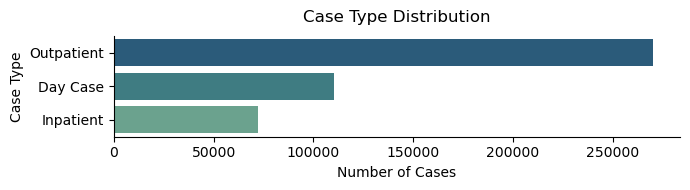

In [43]:
plt.figure(figsize = (7, 2))
sns.barplot(
    data = df_case_type,
    y = 'Case_Type',
    x = 'count',
    palette = 'crest_r',
    hue = 'Case_Type',
    
)

plt.title('Case Type Distribution', pad=10, fontsize=12)
plt.xlabel('Number of Cases')
plt.ylabel('Case Type')

sns.despine()
plt.tight_layout()
plt.show()

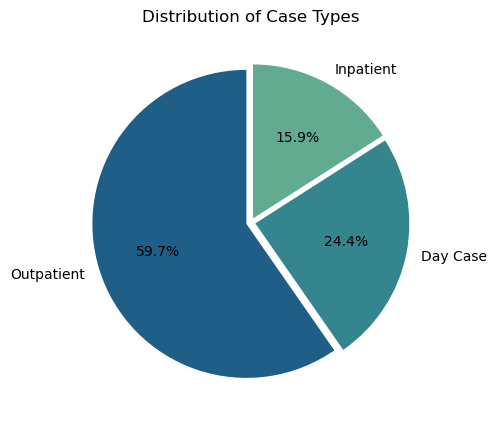

In [35]:

# Define the explode tuple dynamically
explode = [0.03] * len(df_case_type)

plt.figure(figsize=(10, 5))
plt.pie(
    df_case_type['count'],
    labels=df_case_type['Case_Type'],
    colors=sns.color_palette('crest_r', n_colors=len(df_case_type)),
    autopct='%1.1f%%',
    startangle=90,
    explode=explode
)

plt.title("Distribution of Case Types")
plt.show()

In [25]:
df_ct_line = df.groupby(['Year', 'Month_Name', 'Case_Type']).size().reset_index(name='count')
df_ct_line = df_ct_line.sort_values(by=['Year', 'Month_Name', 'Case_Type'])
df_ct_line['Month_Name'] = pd.Categorical(df_ct_line['Month_Name'], 
                                           categories=['January', 'February', 'March', 'April', 'May', 'June', 
                                                       'July', 'August', 'September', 'October', 'November', 'December'],
                                           ordered=True)
df_ct_line = df_ct_line.sort_values(by=['Year', 'Month_Name', 'Case_Type'])
df_ct_line = df_ct_line.reset_index(drop=True)
df_ct_line

,Year,Month_Name,Case_Type,count
0,2018,January,Day Case,2778
1,2018,January,Inpatient,1884
2,2018,January,Outpatient,6868
3,2018,February,Day Case,2791
4,2018,February,Inpatient,1942
...,...,...,...,...
112,2021,February,Inpatient,2021
113,2021,February,Outpatient,7526
114,2021,March,Day Case,3289
115,2021,March,Inpatient,2002


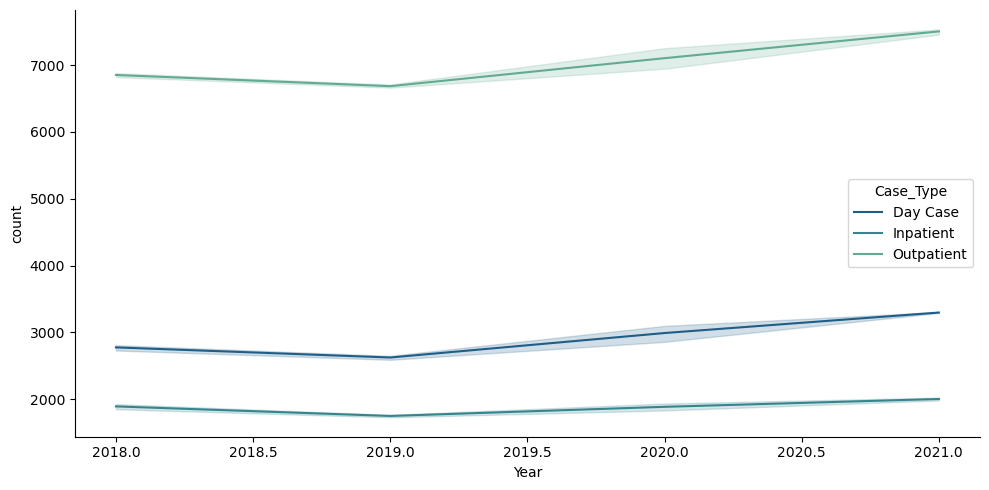

In [26]:
plt.figure(figsize=(10, 5))
sns.lineplot(
    data = df_ct_line,
    y = 'count',
    x = 'Year',
    palette = 'crest_r',
    hue = 'Case_Type',
    
)

sns.despine()
plt.tight_layout()
plt.show()

In [39]:
df_case_type_mean = df.groupby('Case_Type')['Total'].median().reset_index()
df_case_type_mean = df_case_type_mean.sort_values(by = 'Total', ascending = False)

df_case_type_mean

,Case_Type,Total
2,Outpatient,29.0
0,Day Case,6.0
1,Inpatient,4.0


<Axes: xlabel='Total', ylabel='Case_Type'>

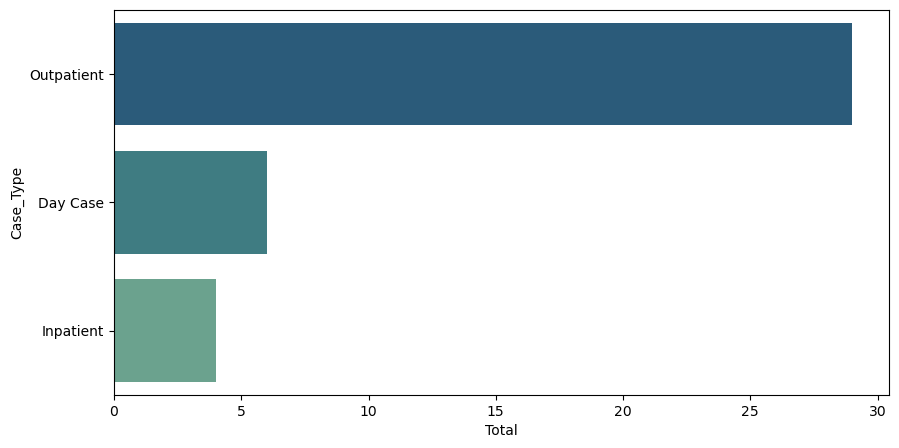

In [40]:
plt.figure(figsize=(10, 5))
sns.barplot(
    data = df_case_type_mean,
    y = 'Case_Type',
    x = 'Total',
    palette = 'crest_r',
    hue = 'Case_Type',
    
)